# New evaluation test set playground

this file will be used to test different finetuned models. everytime it is used, please save the results in a different copy and leave this file as clean as possible 

Changes:


In [1]:
import os
import numpy as np
import json
import pandas as pd
from birdnetlib.analyzer import Analyzer
from birdnetlib.batch import DirectoryAnalyzer
import matplotlib.pyplot as plt 
import copy         # deepcopy

## test the model and extract predictions

In [2]:
# E:\Giacomo\Tovanella-20241110T120546Z-001\training_sessions\session_0\test\Certhia familiaris_Eurasian Treecreeper\20200217_160000_591.wav
# salva tutti i risultati su questo array
complete_pred_segments = {}
def on_analyze_complete(recording):
    # E:\Giacomo\Tovanella-20241110T120546Z-001\test_set_augm\test\Periparus ater_Coal Tit\20200215_090000_88.wav
    audio_name = recording.path.split('\\')[-1]
    if len(audio_name.split("_")) == 3:
        date, number, segm_id = audio_name.split('_')    # <20200215>_<090000>_<88.wav>
        segm_id = segm_id.split('.')[0]               # <88>.<wav>
        audio_name = "_".join([date, number]) + ".WAV"      # 20200215_090000.WAV
    else:                                                # CLH_20230506_053600_18.wav
        site, date, number, segm_id = audio_name.split('_')    # <CLH>_<20230506>_<053600>_<18.wav>
        segm_id = segm_id.split('.')[0]               # <18>.<wav>
        audio_name = "_".join([site, date, number]) + ".WAV"      # CLH_20200215_090000.WAV
    if audio_name not in complete_pred_segments:
        complete_pred_segments[audio_name] = {}
    if segm_id not in complete_pred_segments[audio_name]:
        complete_pred_segments[audio_name][segm_id] = {}
    complete_pred_segments[audio_name][segm_id] = { 
        detection["label"]: detection["confidence"] for detection in recording.detections 
    }
    print("Analyzing ", recording.path)

def on_error(recording, error):
    print("An exception occurred: {}".format(error))
    print(recording.path)

In [3]:
complete_pred_segments = {}
model_name = "test_A"
model_path = f"classifiers/official/{model_name}/CustomClassifier.tflite"
labels_path = f"classifiers/official/{model_name}/CustomClassifier_Labels.txt"
valid_path = "E:/Giacomo/Tovanella/DATASET/validation"
min_conf = 0.1

analyzer = Analyzer(
    classifier_labels_path=labels_path, 
    classifier_model_path=model_path,
)      

load_custom_models
Custom model loaded.
loading custom classifier labels
Labels loaded.
load model False
Model loaded.
Labels loaded.
load_species_list_model
Meta model loaded.


In [4]:
for folder in os.listdir(valid_path):
    directory = os.path.join(valid_path, folder)

    print("Starting Watcher: ", folder)
    batch = DirectoryAnalyzer(
        directory,
        analyzers=[analyzer],
        min_conf=min_conf,
    )

    batch.on_analyze_complete = on_analyze_complete
    batch.on_error = on_error
    batch.process()

Starting Watcher:  Certhia familiaris_Eurasian Treecreeper
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20190603_030000_190.wav
Analyzing  E:\Giacomo\Tovanella\DATASET\validation\Certhia familiaris_Eurasian Treecreeper\20190603_030000_190.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20190603_030000_193.wav
Analyzing  E:\Giacomo\Tovanella\DATASET\validation\Certhia familiaris_Eurasian Treecreeper\20190603_030000_193.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20190603_060000_194.wav
Analyzing  E:\Giacomo\Tovanella\DATASET\validation\Certhia familiaris_Eurasian Treecreeper\20190603_060000_194.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20190603_100000_10.wav
Analyzing  E:\Giacomo\Tovanella\DATASET\validation\Certhia familiaris_Eurasian Treecreeper\20190603_100000_10.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20

In [5]:
# SAVE
with open(f"classifiers/official/{model_name}/valid_pred_segments.json", "w") as f:
    json.dump(complete_pred_segments, f)

In [6]:
# LOAD
# with open(f"classifiers/official/{model_name}/complete_pred_segments_{str(min_conf).replace('.', '_')}.json") as f:
#     complete_pred_segments = json.load(f)

## extract predicted and true segments 

In [7]:
# open best_threshold_by_species
# with open("utils/best_threshold_by_species.json") as f:
#     best_threshold_by_species = json.load(f)

In [8]:
pred_segments = copy.deepcopy(complete_pred_segments)
for audio in complete_pred_segments:
    for segm_id in complete_pred_segments[audio]:
        species_to_save = []
        for label, conf_score in complete_pred_segments[audio][segm_id].items():
            if conf_score > 0.1:
            # if conf_score > best_threshold_by_species[label]:
                species_to_save.append(label)
        pred_segments[audio][segm_id] = species_to_save

pred_segments

{'20190603_030000.WAV': {'190': ['Certhia familiaris_Eurasian Treecreeper',
   'Regulus regulus_Goldcrest',
   'Turdus philomelos_Song Thrush'],
  '193': ['Certhia familiaris_Eurasian Treecreeper',
   'Regulus regulus_Goldcrest',
   'Turdus philomelos_Song Thrush'],
  '3': ['Regulus regulus_Goldcrest',
   'Troglodytes troglodytes_Eurasian Wren',
   'Turdus philomelos_Song Thrush'],
  '36': ['Turdus philomelos_Song Thrush',
   'Troglodytes troglodytes_Eurasian Wren',
   'Regulus ignicapilla_Common Firecrest',
   'Periparus ater_Coal Tit'],
  '66': ['Turdus philomelos_Song Thrush',
   'Troglodytes troglodytes_Eurasian Wren',
   'Periparus ater_Coal Tit'],
  '86': ['Regulus regulus_Goldcrest',
   'Regulus ignicapilla_Common Firecrest',
   'Periparus ater_Coal Tit'],
  '10': ['Regulus ignicapilla_Common Firecrest',
   'Turdus philomelos_Song Thrush',
   'Regulus regulus_Goldcrest'],
  '110': ['Regulus ignicapilla_Common Firecrest',
   'Regulus regulus_Goldcrest',
   'Turdus philomelos_Song

In [9]:
with open("utils/true_segments_valid.json") as f:
    all_segments = json.load(f)
# filter segments in true_segments from the ones not present in pred
true_segments_valid = {audio: { 
        key: value for key, value in all_segments[audio].items() if key in pred_segments[audio]
    } for audio in all_segments.keys() if audio in pred_segments}


## get results

In [10]:
from sklearn.preprocessing import MultiLabelBinarizer

audio_path = "E:/Giacomo/Tovanella/DATASET/test"
species_list = os.listdir(audio_path)

mlb = MultiLabelBinarizer()
mlb.fit([list(species_list)])

len(mlb.classes_)

21

### side quest: get confidence scores for each label

In [11]:
conf_scores = { specie: [] for specie in species_list }
for audio in pred_segments:
    for segm, species in pred_segments[audio].items():
        for specie in species:
            if specie not in species_list:
                continue
            conf_scores[specie].append([complete_pred_segments[audio][segm][specie], specie in true_segments_valid[audio][segm]])
# len(conf_scores["Dendrocopos major_Great Spotted Woodpecker"])

In [12]:
with open(f"classifiers/official/{model_name}/conf_scores.json", "w") as f:
    json.dump(conf_scores, f)

In [13]:
from sklearn.metrics import precision_recall_fscore_support

best_threshold_by_species = {}
for specie, data in conf_scores.items():
    if len(data) < 2:
        best_threshold_by_species[specie] = 0.1
        continue
    scores = np.array([x[0] for x in data])
    labels = np.array([x[1] for x in data])

    best_threshold = 0
    best_f1 = 0
    thresholds = np.linspace(scores.min(), scores.max(), 100)  # 50 soglie testate

    for threshold in thresholds:
        preds = scores >= threshold
        precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary", zero_division=0)
        
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    best_threshold_by_species[specie] = best_threshold
    print(f"Soglia ottimale per {specie}: {best_threshold:.3f} con f1 score: {best_f1:.3f}")

Soglia ottimale per Certhia familiaris_Eurasian Treecreeper: 0.181 con f1 score: 0.750
Soglia ottimale per Dendrocopos major_Great Spotted Woodpecker: 0.393 con f1 score: 0.688
Soglia ottimale per Dryocopus martius_Black Woodpecker: 0.111 con f1 score: 0.750
Soglia ottimale per Erithacus rubecula_European Robin: 0.236 con f1 score: 0.618
Soglia ottimale per Fringilla coelebs_Common Chaffinch: 0.372 con f1 score: 0.753
Soglia ottimale per Lophophanes cristatus_Crested Tit: 0.747 con f1 score: 0.818
Soglia ottimale per Loxia curvirostra_Common Crossbill: 0.116 con f1 score: 1.000
Soglia ottimale per Pecking_: 0.512 con f1 score: 0.947
Soglia ottimale per Periparus ater_Coal Tit: 0.373 con f1 score: 0.928
Soglia ottimale per Phylloscopus collybita_Common Chiffchaff: 0.591 con f1 score: 0.659
Soglia ottimale per Prunella modularis_Dunnock: 0.132 con f1 score: 0.762
Soglia ottimale per Rain_: 0.313 con f1 score: 0.825
Soglia ottimale per Regulus ignicapilla_Common Firecrest: 0.271 con f1 sc

In [14]:
with open(f"classifiers/official/{model_name}/best_threshold_by_species.json", "w") as f:
    json.dump(best_threshold_by_species, f)

In [15]:
complete_pred_segments = {}
test_path = "E:/Giacomo/Tovanella/DATASET/test"
for folder in os.listdir(test_path):
    directory = os.path.join(test_path, folder)

    print("Starting Watcher: ", folder)
    batch = DirectoryAnalyzer(
        directory,
        analyzers=[analyzer],
        min_conf=min_conf,
    )

    batch.on_analyze_complete = on_analyze_complete
    batch.on_error = on_error
    batch.process()

Starting Watcher:  Certhia familiaris_Eurasian Treecreeper
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20190608_070000_88.wav
Analyzing  E:\Giacomo\Tovanella\DATASET\test\Certhia familiaris_Eurasian Treecreeper\20190608_070000_88.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20190608_090000_103.wav
Analyzing  E:\Giacomo\Tovanella\DATASET\test\Certhia familiaris_Eurasian Treecreeper\20190608_090000_103.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20190608_090000_99.wav
Analyzing  E:\Giacomo\Tovanella\DATASET\test\Certhia familiaris_Eurasian Treecreeper\20190608_090000_99.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20200215_110000_129.wav
Analyzing  E:\Giacomo\Tovanella\DATASET\test\Certhia familiaris_Eurasian Treecreeper\20200215_110000_129.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording 20200217_160000_196.wav
Anal

In [16]:
with open(f"classifiers/official/{model_name}/complete_pred_segments.json", "w") as f:
    json.dump(complete_pred_segments, f)

In [17]:
# LOAD
# with open(f"classifiers/official/{model_name}/best_threshold_by_species.json") as f:
#     best_threshold_by_species = json.load(f)

In [18]:
pred_segments = copy.deepcopy(complete_pred_segments)
for audio in complete_pred_segments:
    for segm_id in complete_pred_segments[audio]:
        species_to_save = []
        for label, conf_score in complete_pred_segments[audio][segm_id].items():
            # if conf_score > 0.3:
            if conf_score > best_threshold_by_species[label]:
                species_to_save.append(label)
        pred_segments[audio][segm_id] = species_to_save

pred_segments

{'20190608_070000.WAV': {'88': [],
  '101': ['Erithacus rubecula_European Robin'],
  '105': [],
  '129': ['Erithacus rubecula_European Robin'],
  '50': ['Regulus ignicapilla_Common Firecrest'],
  '72': ['Erithacus rubecula_European Robin'],
  '74': ['Turdus philomelos_Song Thrush',
   'Regulus ignicapilla_Common Firecrest']},
 '20190608_090000.WAV': {'103': ['Fringilla coelebs_Common Chaffinch'],
  '99': ['Turdus philomelos_Song Thrush']},
 '20200215_110000.WAV': {'129': [],
  '164': [],
  '165': [],
  '166': [],
  '167': [],
  '68': ['Wind_'],
  '69': ['Wind_'],
  '70': ['Wind_', 'Vegetation_']},
 '20200217_160000.WAV': {'196': [],
  '197': ['Certhia familiaris_Eurasian Treecreeper'],
  '198': ['Certhia familiaris_Eurasian Treecreeper']},
 '20200217_110000.WAV': {'51': ['Dendrocopos major_Great Spotted Woodpecker'],
  '52': ['Dendrocopos major_Great Spotted Woodpecker'],
  '53': ['Dendrocopos major_Great Spotted Woodpecker'],
  '56': ['Dendrocopos major_Great Spotted Woodpecker'],
  '

In [19]:
with open("utils/true_segments_test.json") as f:
    all_segments_test = json.load(f)
true_segments_test = {audio: { 
        key: value for key, value in all_segments_test[audio].items() if key in pred_segments[audio]
    } for audio in all_segments_test.keys() if audio in pred_segments}
true_segments_test["20200215_110000.WAV"]

{'129': ['Certhia familiaris_Eurasian Treecreeper'],
 '164': ['Lophophanes cristatus_Crested Tit'],
 '165': ['Lophophanes cristatus_Crested Tit'],
 '166': ['Lophophanes cristatus_Crested Tit'],
 '167': ['Lophophanes cristatus_Crested Tit'],
 '68': ['Wind_'],
 '69': ['Wind_'],
 '70': ['Wind_']}

### classification report

In [20]:
y_pred = []
y_true = []
for audio in pred_segments:
    # sort in increasing order
    sortable_true_segments = { int(key): value for key, value in true_segments_test[audio].items() }
    sortable_pred_segments = { int(key): value for key, value in pred_segments[audio].items() }
    sorted_true_segments = dict(sorted(sortable_true_segments.items()))
    sorted_pred_segments = dict(sorted(sortable_pred_segments.items()))
    y_true.append(mlb.transform(sorted_true_segments.values()))     # apply transform on every label of every segment
    y_pred.append(mlb.transform(sorted_pred_segments.values()))     # apply transform on every label of every segment

y_true = np.vstack(y_true)
y_pred = np.vstack(y_pred)

In [21]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=mlb.classes_, zero_division=0, output_dict=True)
with open(f"classifiers/official/{model_name}/classification_report.json", "w") as f:
    json.dump(report, f)

report_df = pd.DataFrame(report).T
report_df

,precision,recall,f1-score,support
Certhia familiaris_Eurasian Treecreeper,0.400000,0.285714,0.333333,7.0
Dendrocopos major_Great Spotted Woodpecker,0.636364,1.000000,0.777778,7.0
Dryocopus martius_Black Woodpecker,0.500000,0.222222,0.307692,9.0
Erithacus rubecula_European Robin,0.166667,0.181818,0.173913,22.0
Fringilla coelebs_Common Chaffinch,0.425824,0.165598,0.238462,936.0
Lophophanes cristatus_Crested Tit,0.000000,0.000000,0.000000,8.0
Loxia curvirostra_Common Crossbill,0.857143,1.000000,0.923077,18.0
Muscicapa striata_Spotted Flycatcher,0.000000,0.000000,0.000000,114.0
Pecking_,0.000000,0.000000,0.000000,4.0
Periparus ater_Coal Tit,0.722222,0.393939,0.509804,33.0


### auc roc

In [22]:
y_pred_conf = []

for audio in pred_segments:
    scores_pred = []
    for segm, predictions in complete_pred_segments[audio].items():
        segm_conf_score = np.zeros(len(mlb.classes_))  # Vettore inizializzato a 0 per tutte le classi

        for pred, conf in predictions.items():
            binary_vector = mlb.transform([[pred]])[0]  # Convertiamo in binario (shape: (n_classes,))
            segm_conf_score += binary_vector * conf  # Moltiplichiamo per il confidence score

        scores_pred.append(segm_conf_score)  # Ogni segmento ora ha un array della stessa lunghezza di n_classes
    
    y_pred_conf.append(np.array(scores_pred))  # Lista di array uniformi

# Convertiamo in un array 2D
y_pred_conf = np.vstack(y_pred_conf)

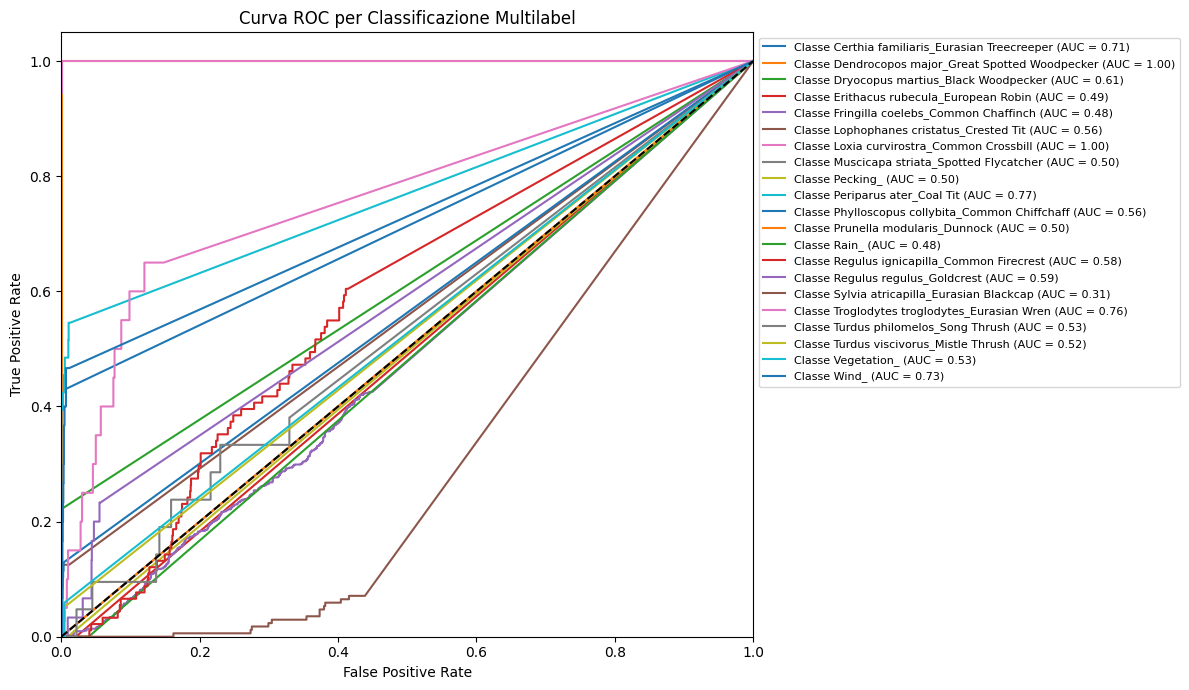

In [23]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12, 7))  # Aumenta la dimensione
n_classes = len(mlb.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_pred_conf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Classe {mlb.classes_[i]} (AUC = {roc_auc:.2f})')

# Linea di riferimento
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC per Classificazione Multilabel')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=8)
plt.tight_layout()
plt.show()

In [24]:
roc_data = {}

n_classes = len(mlb.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_pred_conf[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Salviamo i dati in un dizionario
    roc_data[mlb.classes_[i]] = {
        "fpr": fpr.tolist(),  # Converti in lista per compatibilità JSON
        "tpr": tpr.tolist(),
        "auc": roc_auc
    }
    
with open(f"classifiers/official/{model_name}/roc_auc.json", "w") as f:
    json.dump(roc_data, f)